<a href="https://colab.research.google.com/github/eunxix/eunxix/blob/main/mid_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/gilbutITbook/080228.git

# 데이터를 불러옵니다.
df = pd.read_csv("./080228/deeplearning/dataset/ThoraricSurgery.csv", header=None)

# 데이터를 미리 보겠습니다.
df


fatal: destination path '080228' already exists and is not an empty directory.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [91]:
X = df.iloc[:,0:17]
y = df.iloc[:,17]

In [92]:
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=17, activation='relu'))
model.add(Dense(17, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 30)                540       
                                                                 
 dense_161 (Dense)           (None, 17)                527       
                                                                 
 dense_162 (Dense)           (None, 8)                 144       
                                                                 
 dense_163 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,220
Trainable params: 1,220
Non-trainable params: 0
_________________________________________________________________


In [113]:
# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.25) # 0.8 x 0.25 = 0.2

score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/50
29/29 [==============================] - 0s 5ms/step - loss: 0.4101 - accuracy: 0.8475 - val_loss: 0.5628 - val_accuracy: 0.8723
Epoch 2/50
29/29 [==============================] - 0s 3ms/step - loss: 0.4096 - accuracy: 0.8475 - val_loss: 0.5633 - val_accuracy: 0.8830
Epoch 3/50
29/29 [==============================] - 0s 3ms/step - loss: 0.4104 - accuracy: 0.8475 - val_loss: 0.5685 - val_accuracy: 0.8830
Epoch 4/50
29/29 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8475 - val_loss: 0.5791 - val_accuracy: 0.8830
Epoch 5/50
29/29 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8475 - val_loss: 0.5639 - val_accuracy: 0.8723
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 0.4130 - accuracy: 0.8440 - val_loss: 0.5629 - val_accuracy: 0.8830
Epoch 7/50
29/29 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8440 - val_loss: 0.5702 - val_accuracy: 0.8723
Epoch 8/50
29/29 [==

In [114]:
# 모델 저장의 조건을 설정합니다.
#modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
#checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
#history=model.fit(X_train, y_train, epochs=60, batch_size=10, validation_split=0.25, verbose=0, callbacks=[checkpointer])

NameError: ignored

In [115]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 0.8511
Test accuracy: 0.8510638475418091


In [122]:
# 그래프 확인을 위한 긴 학습 
history=model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_split=0.25)

Epoch 1/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.2940 - accuracy: 0.8901 - val_loss: 2.1753 - val_accuracy: 0.8191
Epoch 2/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3051 - accuracy: 0.8865 - val_loss: 2.1780 - val_accuracy: 0.8511
Epoch 3/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.2952 - accuracy: 0.8794 - val_loss: 2.2222 - val_accuracy: 0.8617
Epoch 4/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.3009 - accuracy: 0.8794 - val_loss: 2.2219 - val_accuracy: 0.8404
Epoch 5/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.2901 - accuracy: 0.8759 - val_loss: 2.2091 - val_accuracy: 0.7872
Epoch 6/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.2964 - accuracy: 0.8936 - val_loss: 2.1976 - val_accuracy: 0.8085
Epoch 7/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.2927 - accuracy: 0.8901 - val_loss: 2.2110 - val_accuracy: 0.8617
Epoch 8/1000


In [123]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.293953,0.890071,2.175323,0.819149
1,0.305082,0.886525,2.177997,0.851064
2,0.295190,0.879433,2.222191,0.861702
3,0.300919,0.879433,2.221879,0.840426
4,0.290112,0.875886,2.209143,0.787234
...,...,...,...,...
995,0.221168,0.921986,3.998734,0.787234
996,0.220769,0.921986,3.996749,0.797872
997,0.221962,0.918440,3.998976,0.787234
998,0.221863,0.921986,4.007704,0.787234


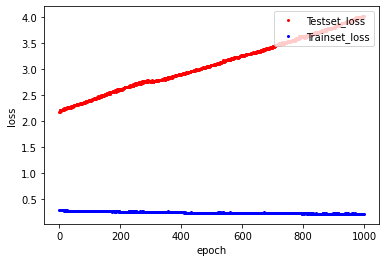

In [124]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

#x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [125]:
# 학습이 언제 자동 중단될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
#modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
#checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


NameError: ignored

In [126]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 4ms/step - loss: 1.7457 - accuracy: 0.7553
Test accuracy: 0.7553191781044006
